# Setup

## Import Libraries and Data

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns

plt.style.use('fivethirtyeight')

%matplotlib inline

pd.set_option('display.max_columns', 500)

In [2]:
# import senator data
sens = pd.read_csv('/Users/Alexz/CodeMaster/capstone/capstone_repo/data/sens_final.csv')
sens.drop('Unnamed: 0', inplace=True, axis = 1)
sens.sort_values('race_id', inplace=True)
print(sens.shape)
sens.head(10)

(598, 43)


,race_id,office,loc_date_id,state,abbrev,year,GOP_win,winner,rival,pred_GOP,pred_DEM,unopposed,inc_GOP_running,inc_DEM_running,prez_GOP,approval_effects_GOP,approval_effects_DEM,nat_UR_effects_GOP,nat_UR_effects_DEM,state_UR_effects_GOP,state_UR_effects_DEM,total_male,total_female,age_under18,age_18to29,age_30to59,age_60over,race_white_nh,race_black,race_natamer,race_asian,race_hispanic,percent_male,percent_female,percent_under18,percent_age_18to29,percent_age_30to59,percent_age_60over,percent_race_white,percent_race_black,percent_race_natamer,percent_race_asian,percent_race_hispanic
242,AK_sen2_2002,AK_sen,AK_2002,Alaska,AK,2002,0,Mark Begich,Ted Stevens,1,0,0,1,0,1.0,36.666667,0.000000,5.7,0.0,7.5,0.0,333215,310377,190049,106283,303182,60596,413811,22082,99409,42067,28531,0.517743,0.482257,0.295294,0.165140,0.471078,0.094153,0.642971,0.034311,0.154460,0.065363,0.044331
0,AK_sen_1978,AK_sen,AK_1978,Alaska,AK,1978,1,Ted Stevens,Donald W Hobbs,1,0,0,1,0,0.0,0.000000,13.000000,0.0,5.8,0.0,10.2,203084,178473,128568,101180,133656,18154,288403,12781,54741,14337,8525,0.532251,0.467749,0.336956,0.265177,0.350291,0.047579,0.755858,0.033497,0.143467,0.037575,0.022343
35,AK_sen_1984,AK_sen,AK_1984,Alaska,AK,1984,1,Ted Stevens,John E Havelock,1,0,0,1,0,1.0,22.000000,0.000000,7.4,0.0,9.5,0.0,243771,217356,147385,108726,179125,25892,340553,17229,72893,15549,12825,0.528642,0.471358,0.319619,0.235783,0.388450,0.056149,0.738523,0.037363,0.158076,0.033720,0.027812
68,AK_sen_1986,AK_sen,AK_1986,Alaska,AK,1986,1,Frank Murkowski,Glenn Olds,1,0,0,1,0,1.0,36.000000,0.000000,7.0,0.0,11.0,0.0,259137,231630,155704,108880,197165,29017,359597,18970,77162,19167,14485,0.528025,0.471975,0.317267,0.221857,0.401749,0.059126,0.732724,0.038654,0.157227,0.039055,0.029515
102,AK_sen_1990,AK_sen,AK_1990,Alaska,AK,1990,1,Ted Stevens,Michael Beasley,1,0,0,1,0,1.0,27.666667,0.000000,5.9,0.0,7.3,0.0,289867,260176,172344,109188,233245,35266,397689,22451,85698,26402,17803,0.526990,0.473010,0.313328,0.198508,0.424049,0.064115,0.723014,0.040817,0.155802,0.048000,0.032367
137,AK_sen_1992,AK_sen,AK_1992,Alaska,AK,1992,1,Frank Murkowski,Tony Smith,1,0,0,1,0,1.0,-24.250000,0.000000,7.3,0.0,8.6,0.0,296716,268705,176019,107406,243178,38818,399887,22318,88167,28806,19413,0.524770,0.475230,0.311306,0.189958,0.430083,0.068653,0.707238,0.039471,0.155932,0.050946,0.034334
173,AK_sen_1996,AK_sen,AK_1996,Alaska,AK,1996,1,Ted Stevens,Jeff Whittaker,1,0,0,1,0,0.0,0.000000,21.000000,0.0,5.2,0.0,7.5,310414,285762,183368,103843,263044,45922,404285,22053,93105,33614,22632,0.520675,0.479325,0.307574,0.174182,0.441219,0.077028,0.678130,0.036991,0.156170,0.056383,0.037962
207,AK_sen_1998,AK_sen,AK_1998,Alaska,AK,1998,1,Frank Murkowski,Joe Sonneman,1,0,0,1,0,0.0,0.000000,32.666667,0.0,4.5,0.0,6.4,317263,294291,187042,102061,272977,49474,406484,21920,95574,36018,24242,0.518782,0.481218,0.305847,0.166888,0.446366,0.080899,0.664674,0.035843,0.156281,0.058896,0.039640
241,AK_sen_2002,AK_sen,AK_2002,Alaska,AK,2002,1,Ted Stevens,Frank J Vondersaar,1,0,0,1,0,1.0,36.666667,0.000000,5.7,0.0,7.5,0.0,333215,310377,190049,106283,303182,60596,413811,22082,99409,42067,28531,0.517743,0.482257,0.295294,0.165140,0.471078,0.094153,0.642971,0.034311,0.154460,0.065363,0.044331
288,AK_sen_2004,AK_sen,AK_2004,Alaska,AK,2004,1,Lisa Murkowski,Tony Knowles,1,0,0,1,0,1.0,1.500000,0.000000,5.5,0.0,7.3,0.0,342318,317933,189381,112287,323454,68166,418940,22377,100774,45712,31211,0.518466,0.481534,0.286832,0.170067,0.489896,0.103243,0.634516,0.033892,0.152630,0.069234,0.047271


In [3]:
# import govs data
govs = pd.read_csv('/Users/Alexz/CodeMaster/capstone/capstone_repo/data/govs_final.csv')
govs.drop('Unnamed: 0', inplace=True, axis = 1)
govs.sort_values('race_id', inplace=True)
print(govs.shape)
govs.head(10)

(506, 43)


,race_id,office,loc_date_id,state,abbrev,year,GOP_win,winner,rival,pred_GOP,pred_DEM,unopposed,inc_GOP_running,inc_DEM_running,prez_GOP,approval_effects_GOP,approval_effects_DEM,nat_UR_effects_GOP,nat_UR_effects_DEM,state_UR_effects_GOP,state_UR_effects_DEM,total_male,total_female,age_under18,age_18to29,age_30to59,age_60over,race_white_nh,race_black,race_natamer,race_asian,race_hispanic,percent_male,percent_female,percent_under18,percent_age_18to29,percent_age_30to59,percent_age_60over,percent_race_white,percent_race_black,percent_race_natamer,percent_race_asian,percent_race_hispanic
1,AK_gov_1978,AK_gov,AK_1978,Alaska,AK,1978,0,Walter Joseph Hickel,Chancy Croft,1,0,0,0,0,0.0,0.000000,13.000000,0.0,5.8,0.0,10.2,203084,178473,128568,101180,133656,18154,288403,12781,54741,14337,8525,0.532251,0.467749,0.336956,0.265177,0.350291,0.047579,0.755858,0.033497,0.143467,0.037575,0.022343
37,AK_gov_1982,AK_gov,AK_1982,Alaska,AK,1982,0,Bill Sheffield,Tom Fink,1,0,0,0,0,1.0,-6.000000,0.000000,10.4,0.0,10.1,0.0,228406,203083,139065,108572,161085,22768,321507,15489,68625,11932,11166,0.529344,0.470656,0.322291,0.251622,0.373324,0.052766,0.745111,0.035897,0.159042,0.027653,0.025878
73,AK_gov_1986,AK_gov,AK_1986,Alaska,AK,1986,0,Steve Cowper,Arliss Sturgulewski,0,1,0,0,0,1.0,36.000000,0.000000,7.0,0.0,11.0,0.0,259137,231630,155704,108880,197165,29017,359597,18970,77162,19167,14485,0.528025,0.471975,0.317267,0.221857,0.401749,0.059126,0.732724,0.038654,0.157227,0.039055,0.029515
109,AK_gov_1990,AK_gov,AK_1990,Alaska,AK,1990,0,Walter Joseph Hickel,Tony Knowles,0,1,0,0,0,1.0,27.666667,0.000000,5.9,0.0,7.3,0.0,289867,260176,172344,109188,233245,35266,397689,22451,85698,26402,17803,0.526990,0.473010,0.313328,0.198508,0.424049,0.064115,0.723014,0.040817,0.155802,0.048000,0.032367
145,AK_gov_1994,AK_gov,AK_1994,Alaska,AK,1994,0,Tony Knowles,Jim Campbell,1,0,0,0,0,0.0,0.000000,-6.333333,0.0,5.8,0.0,7.4,303565,277234,179693,105624,253111,42370,402086,22185,90636,31210,21023,0.522668,0.477332,0.309389,0.181860,0.435798,0.072951,0.692298,0.038197,0.156054,0.053736,0.036197
181,AK_gov_1998,AK_gov,AK_1998,Alaska,AK,1998,0,Robin Taylor,John Lindauer,0,1,0,0,0,0.0,0.000000,32.666667,0.0,4.5,0.0,6.4,317263,294291,187042,102061,272977,49474,406484,21920,95574,36018,24242,0.518782,0.481218,0.305847,0.166888,0.446366,0.080899,0.664674,0.035843,0.156281,0.058896,0.039640
217,AK_gov_2002,AK_gov,AK_2002,Alaska,AK,2002,1,Frank Murkowski,Fran Ulmer,0,1,0,0,0,1.0,36.666667,0.000000,5.7,0.0,7.5,0.0,333215,310377,190049,106283,303182,60596,413811,22082,99409,42067,28531,0.517743,0.482257,0.295294,0.165140,0.471078,0.094153,0.642971,0.034311,0.154460,0.065363,0.044331
253,AK_gov_2006,AK_gov,AK_2006,Alaska,AK,2006,1,Sarah Palin,Tony Knowles,1,0,0,0,0,1.0,-21.000000,0.000000,4.4,0.0,6.5,0.0,351422,325490,188714,118292,343727,75736,424069,22673,102140,49356,33890,0.519155,0.480845,0.278787,0.174752,0.507787,0.111885,0.626476,0.033495,0.150891,0.072913,0.050066
289,AK_gov_2010,AK_gov,AK_2010,Alaska,AK,2010,0,Ethan Berkowitz,Billy Toien L,1,0,0,0,0,0.0,0.000000,-2.533333,0.0,9.4,0.0,7.8,369628,340603,187378,130300,384271,90876,434327,23263,104871,56646,39249,0.520433,0.479567,0.263827,0.183461,0.541051,0.127953,0.611529,0.032754,0.147658,0.079757,0.055262
326,AK_gov_2014,AK_gov,AK_2014,Alaska,AK,2014,0,Bill Walker I Sean Parnell R J R Mye...,Unopposed,1,0,1,1,0,0.0,0.000000,-11.800000,0.0,5.7,0.0,6.7,387834,355716,186042,142308,424815,106016,444585,23853,107602,63936,44608,0.521598,0.478402,0.250208,0.191390,0.571333,0.142581,0.597922,0.032080,0.144714,0.085987,0.059993


## Lists and Functions to Use

In [4]:
#lists
state_codes = govs.abbrev.unique()
state_names = govs.state.unique()
years = list(range(1976, 2018))

# id_cols = ['race_id', 'office' 'loc_date_id', 'state', 'abbrev', 'year', 'winner', 'rival']
id_cols = ['race_id', 'office', 'loc_date_id', 'state', 'abbrev', 'winner', 'rival']

In [5]:
print(state_codes, len(state_codes))
print(state_names, len(state_names))
print(years, len(years))

['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DE' 'FL' 'GA' 'HI' 'IA' 'ID' 'IL'
 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT' 'NC' 'ND'
 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD' 'TN'
 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY'] 50
['Alaska' 'Alabama' 'Arkansas' 'Arizona' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'Florida' 'Georgia' 'Hawaii' 'Iowa' 'Idaho'
 'Illinois' 'Indiana' 'Kansas' 'Kentucky' 'Louisiana' 'Massachusetts'
 'Maryland' 'Maine' 'Michigan' 'Minnesota' 'Missouri' 'Mississippi'
 'Montana' 'North_Carolina' 'North_Dakota' 'Nebraska' 'New_Hampshire'
 'New_Jersey' 'New_Mexico' 'Nevada' 'New_York' 'Ohio' 'Oklahoma' 'Oregon'
 'Pennsylvania' 'Rhode_Island' 'South_Carolina' 'South_Dakota' 'Tennessee'
 'Texas' 'Utah' 'Virginia' 'Vermont' 'Washington' 'Wisconsin'
 'West_Virginia' 'West Virginia (special election' 'Wyoming'] 51
[1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 19

In [6]:
#functions

def state_filter(code, df=sens):
    df_state = df[df['abbrev'] == code]
    return df_state


## Examine Data

### Data Types

In [7]:
print("Governors Data Types:\n", govs.dtypes, '\n\n')
print("Senators Data Types:\n", sens.dtypes)

Governors Data Types:
 race_id                   object
office                    object
loc_date_id               object
state                     object
abbrev                    object
year                       int64
GOP_win                    int64
winner                    object
rival                     object
pred_GOP                   int64
pred_DEM                   int64
unopposed                  int64
inc_GOP_running            int64
inc_DEM_running            int64
prez_GOP                 float64
approval_effects_GOP     float64
approval_effects_DEM     float64
nat_UR_effects_GOP       float64
nat_UR_effects_DEM       float64
state_UR_effects_GOP     float64
state_UR_effects_DEM     float64
total_male                 int64
total_female               int64
age_under18                int64
age_18to29                 int64
age_30to59                 int64
age_60over                 int64
race_white_nh              int64
race_black                 int64
race_natamer        

### Correlation

In [8]:
sen_vals = sens.drop(id_cols, axis=1)
gov_vals = govs.drop(id_cols, axis=1)

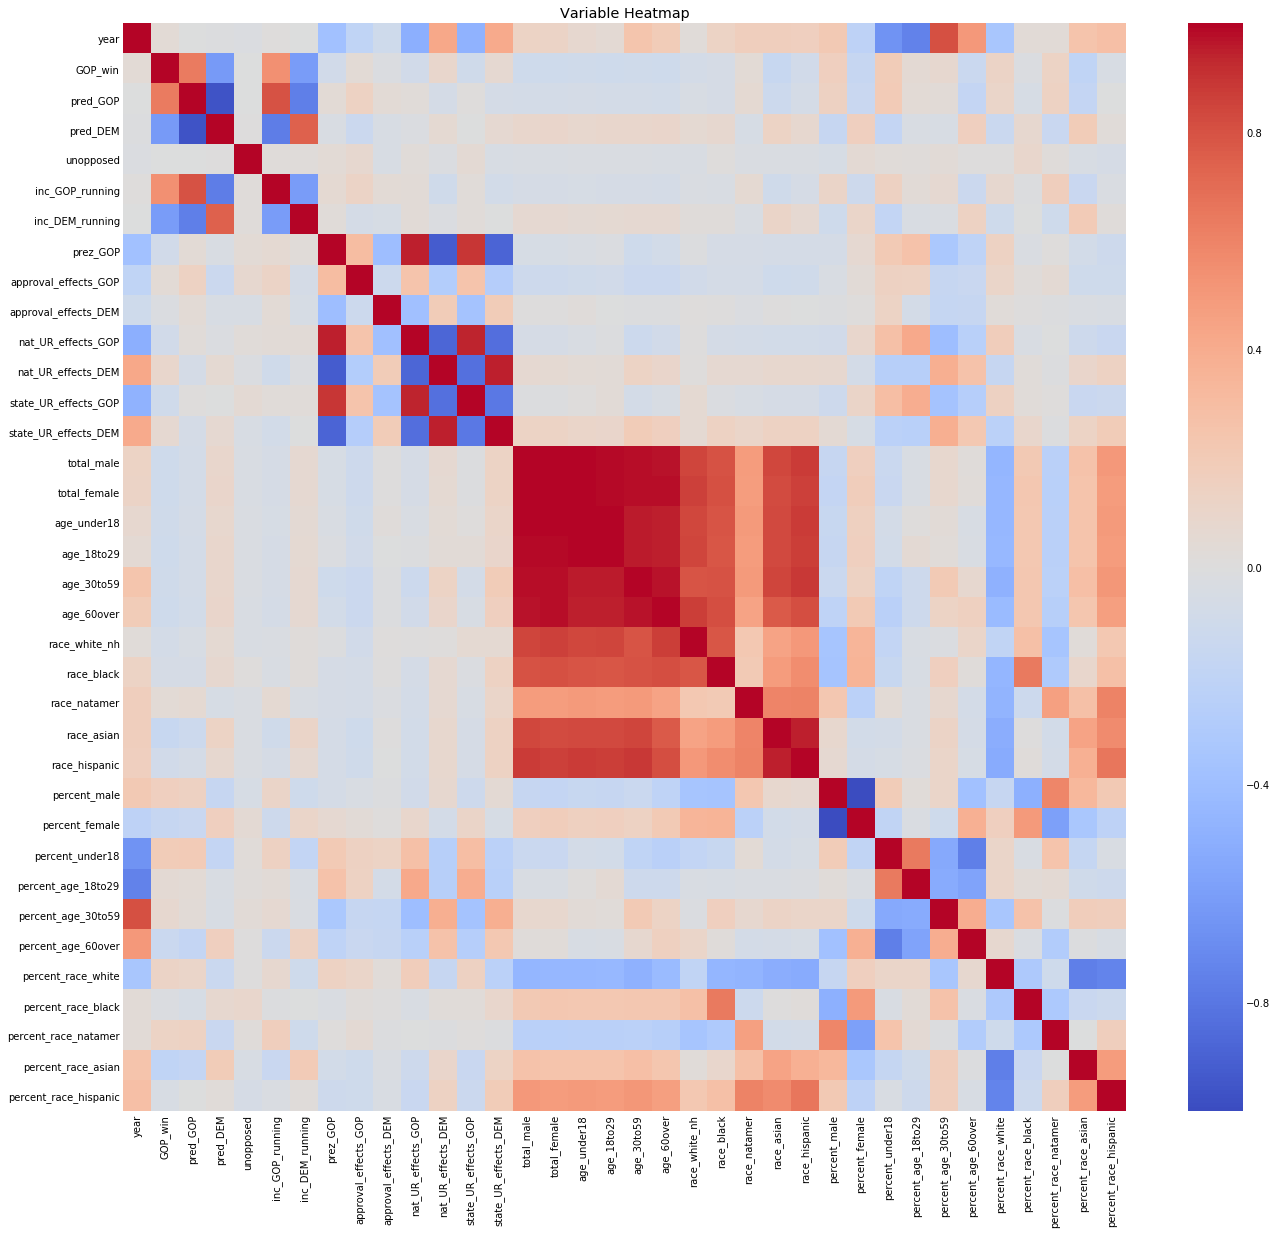

In [9]:
fig, ax = plt.subplots(figsize=(20,20))
plt.title("Variable Heatmap")
sns.heatmap(sen_vals.corr(), cmap = 'coolwarm', ax=ax)

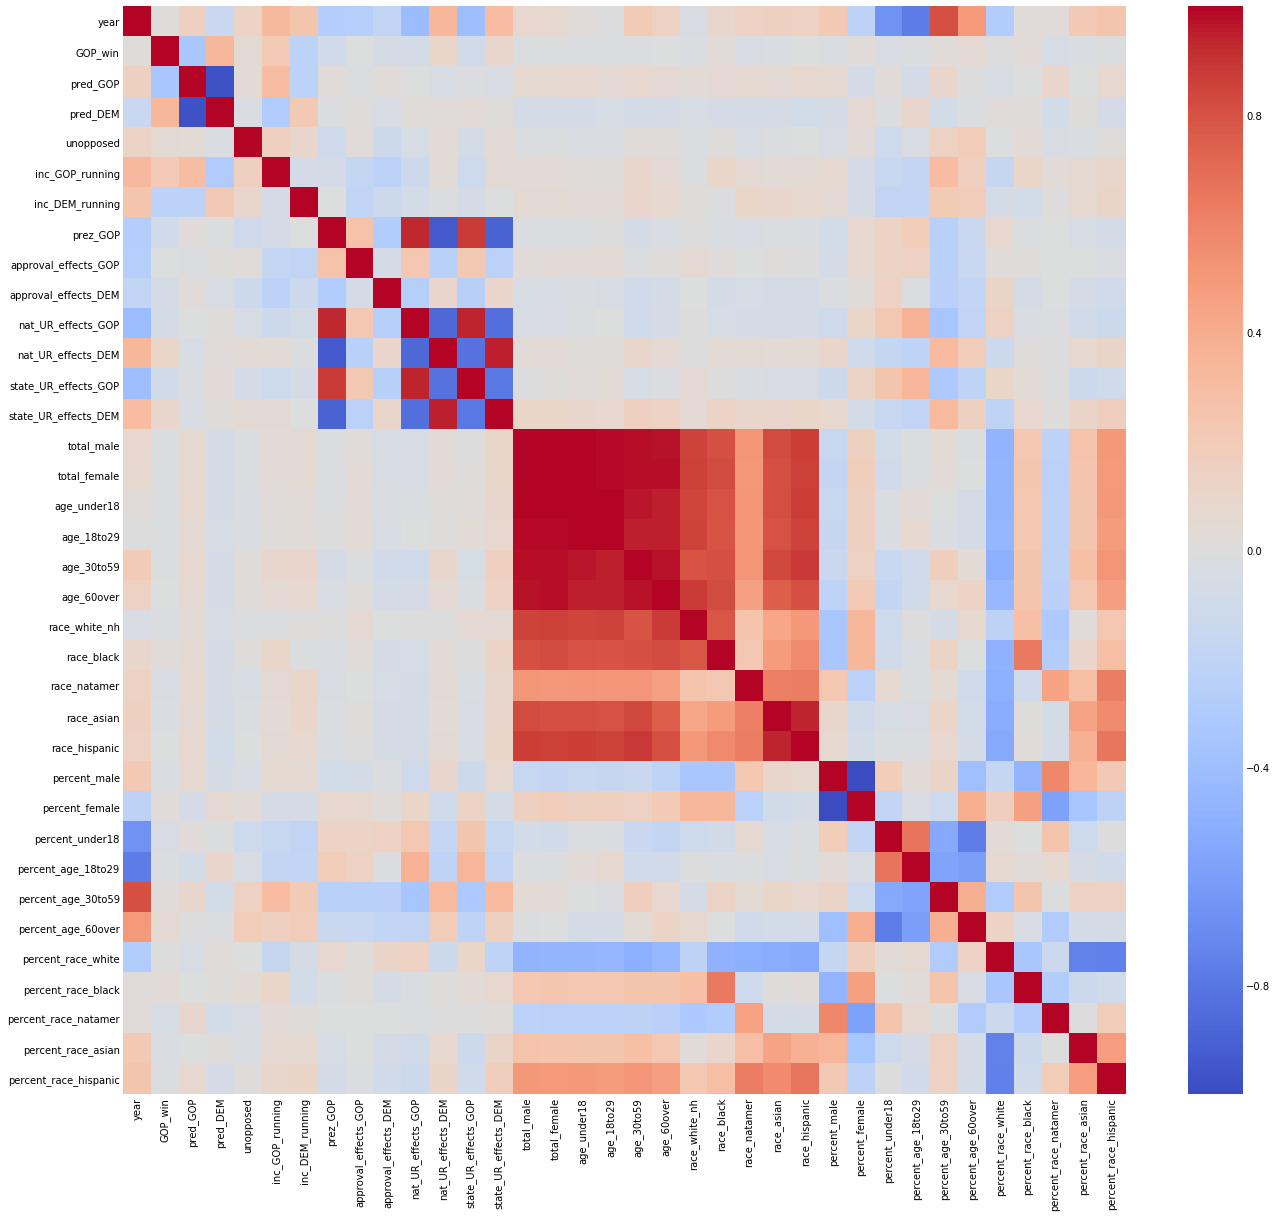

In [10]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(gov_vals.corr(), cmap = 'coolwarm', ax=ax)

### Variable Distribution

In [11]:
for col in list(sen_vals.columns):
    print(col, '\n')
    print(sen_vals[col].describe(), '\n')

year 

count     598.000000
mean     1998.046823
std        11.166375
min      1978.000000
25%      1990.000000
50%      1998.000000
75%      2006.000000
max      2016.000000
Name: year, dtype: float64 

GOP_win 

count    598.000000
mean       0.505017
std        0.500393
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: GOP_win, dtype: float64 

pred_GOP 

count    598.000000
mean       0.503344
std        0.500407
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: pred_GOP, dtype: float64 

pred_DEM 

count    598.000000
mean       0.478261
std        0.499945
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: pred_DEM, dtype: float64 

unopposed 

count    598.000000
mean       0.006689
std        0.081580
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: unoppose

### Graphs Over Time

In [12]:
def scatter_time(col, df):
    fig, ax = plt.subplots(figsize=(8,8))
    plt.scatter(df['year'], df[col])
    plt.xlabel("year")
    plt.ylabel(col)

C:\Users\Alexz\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


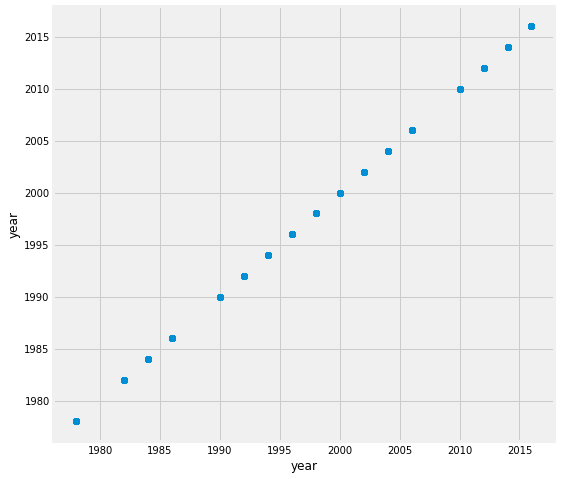

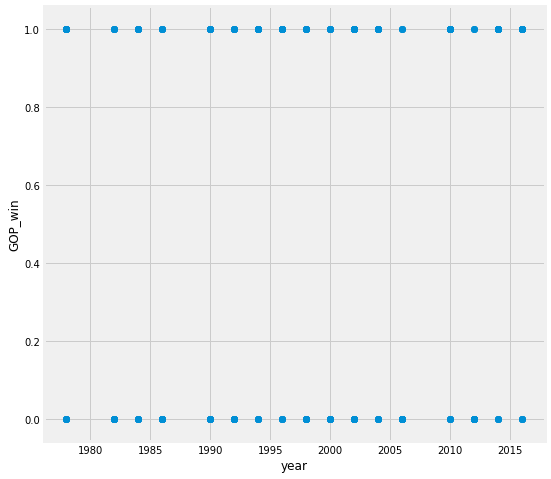

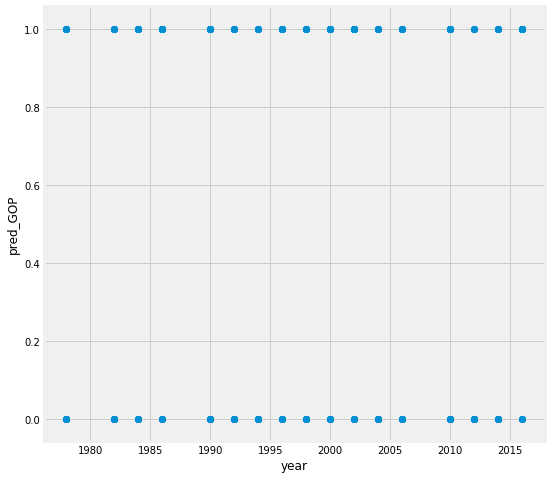

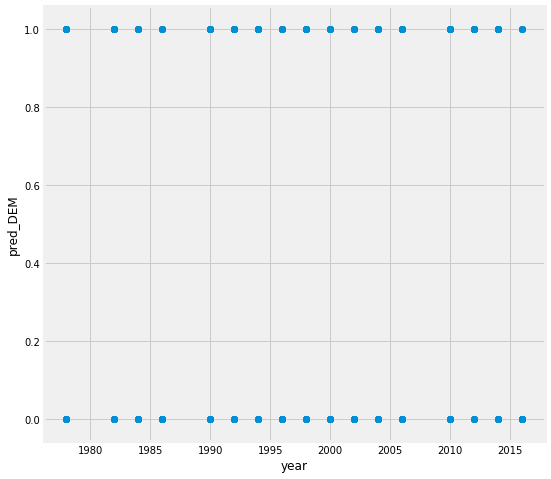

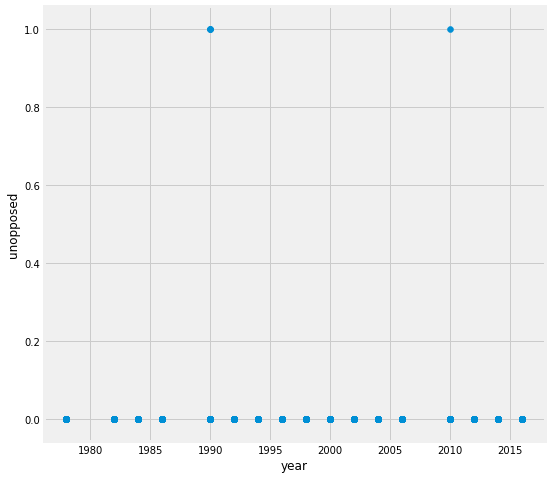

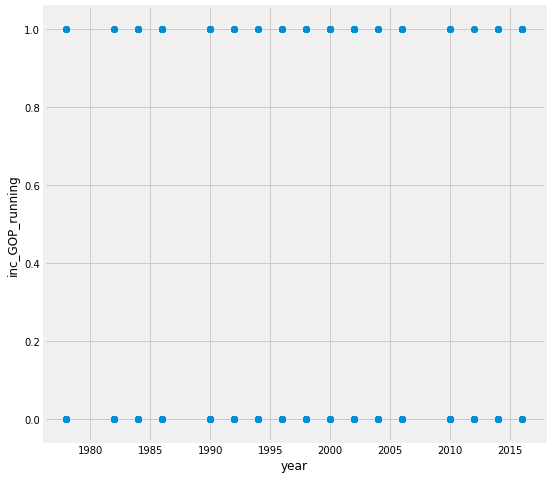

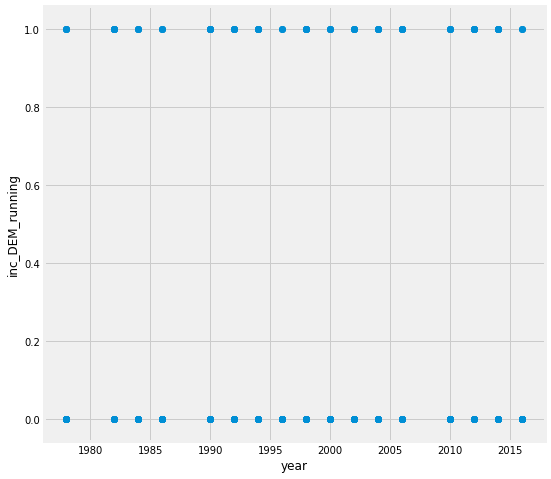

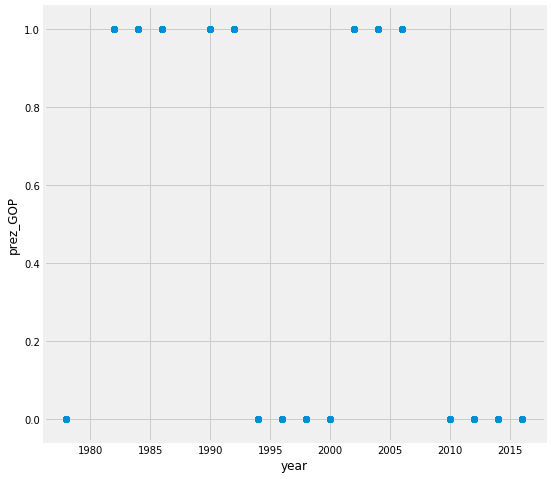

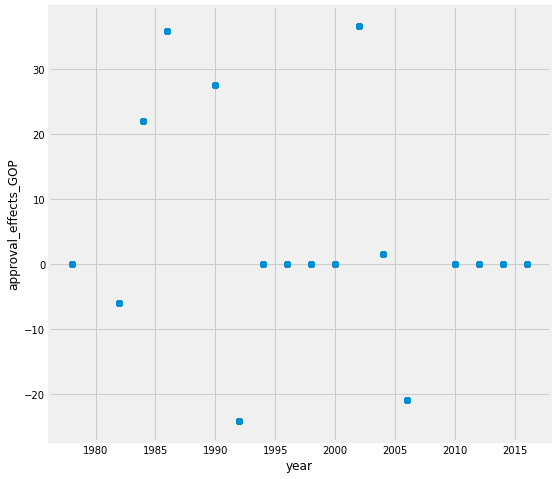

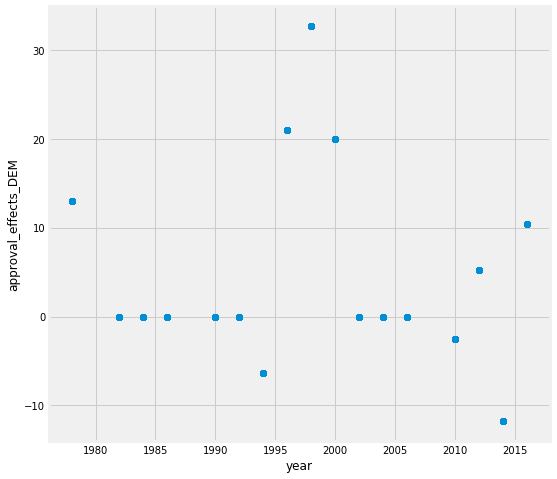

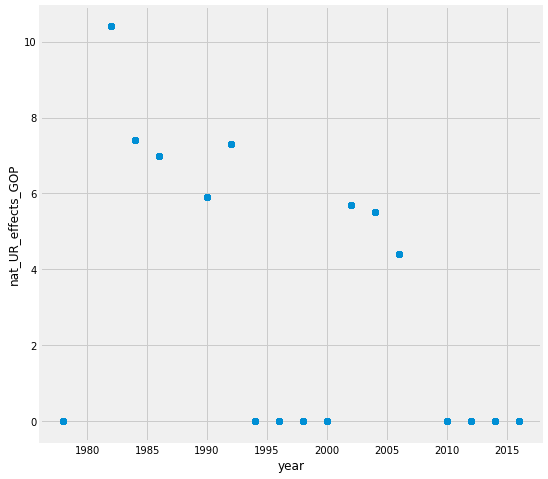

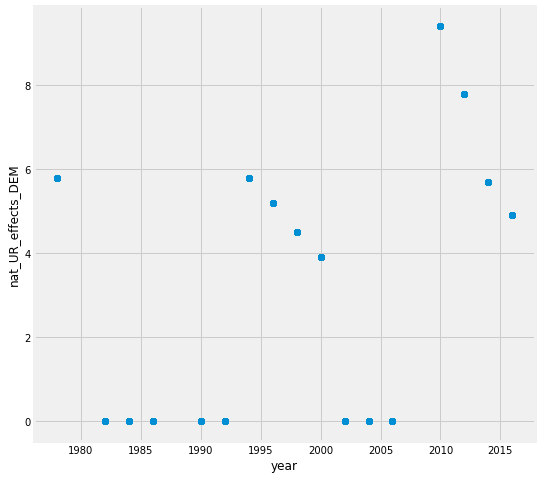

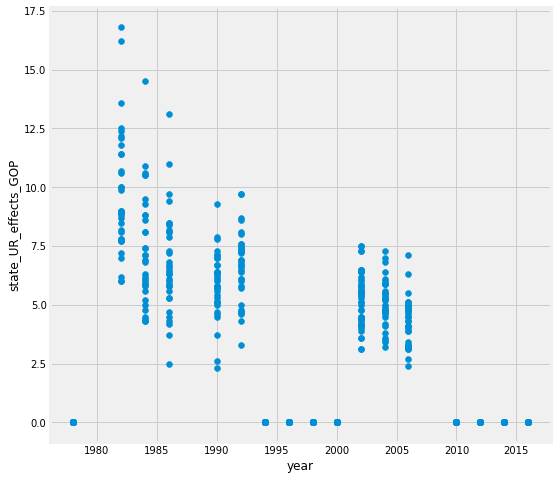

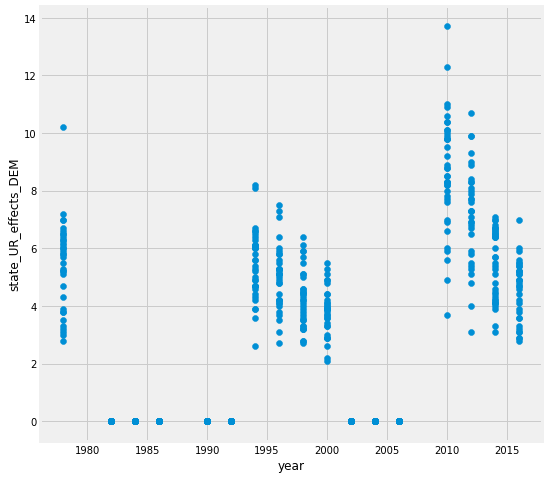

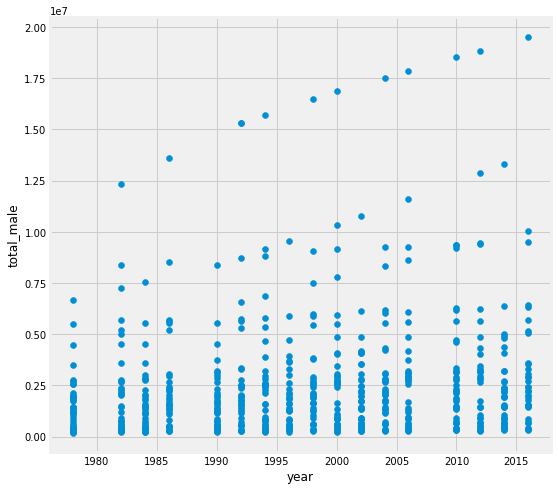

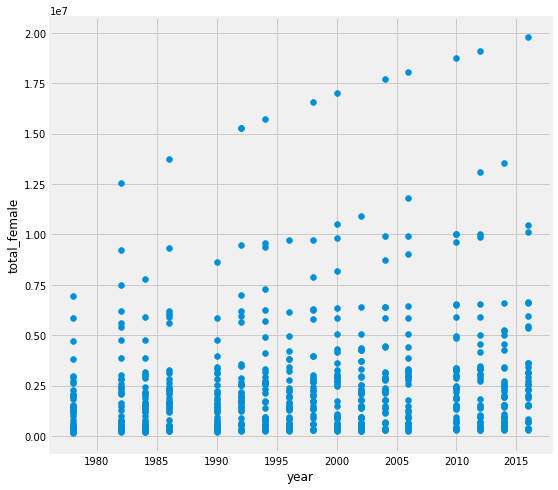

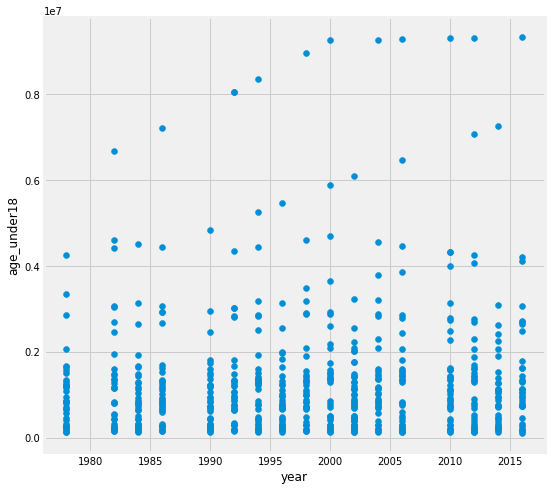

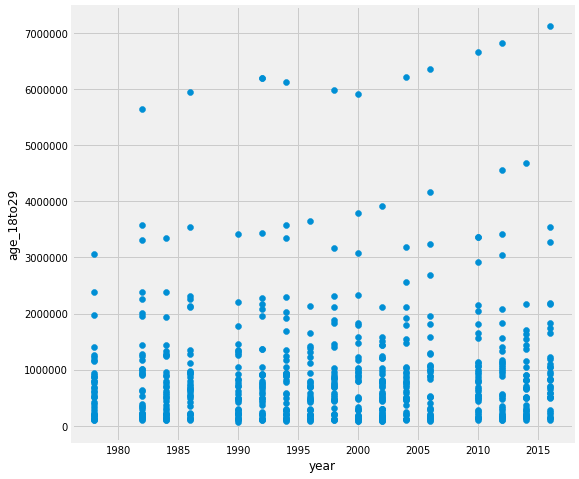

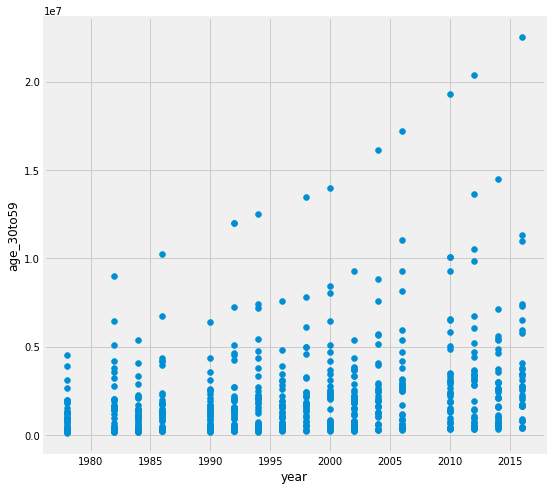

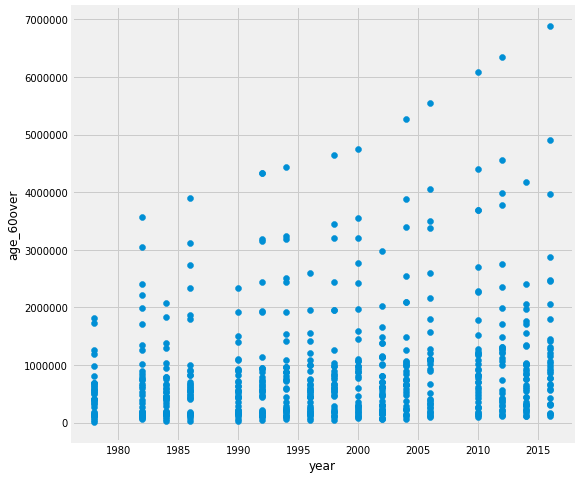

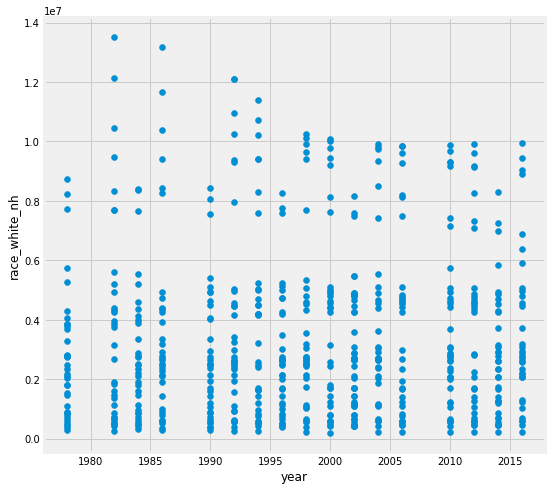

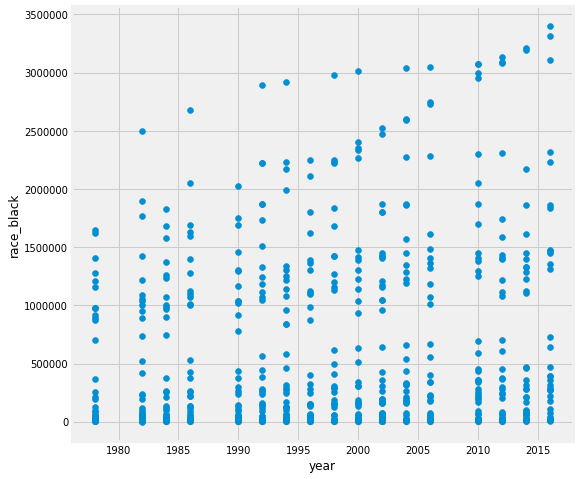

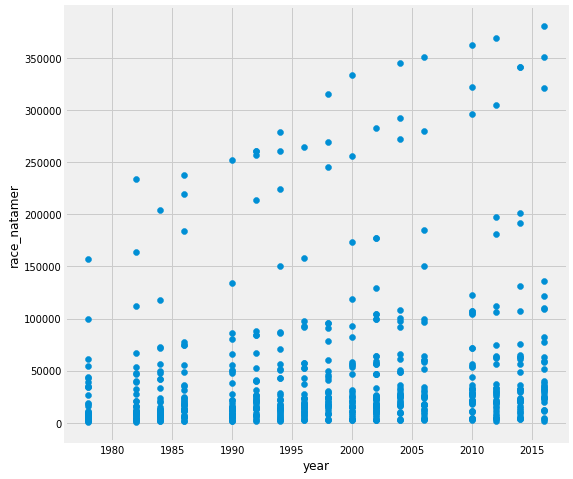

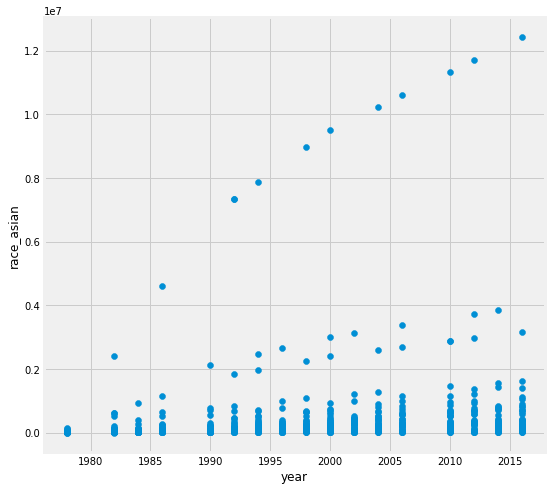

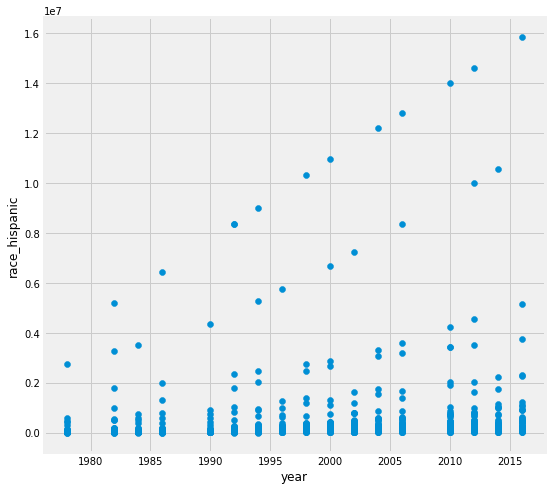

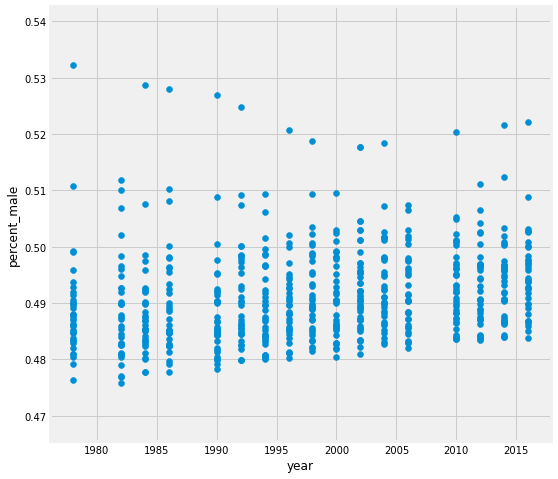

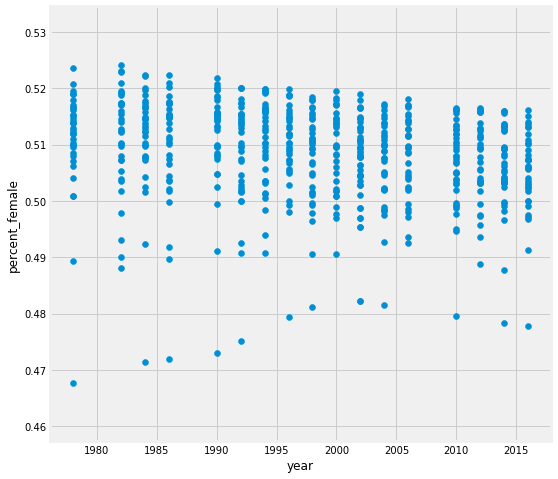

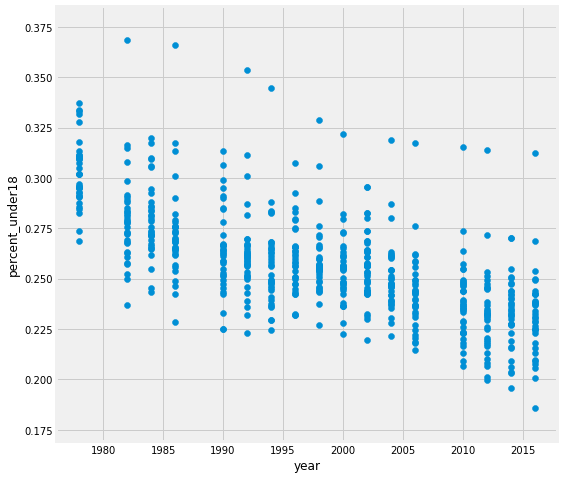

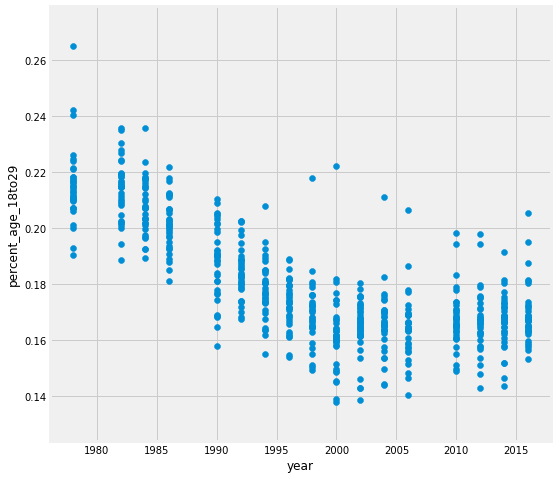

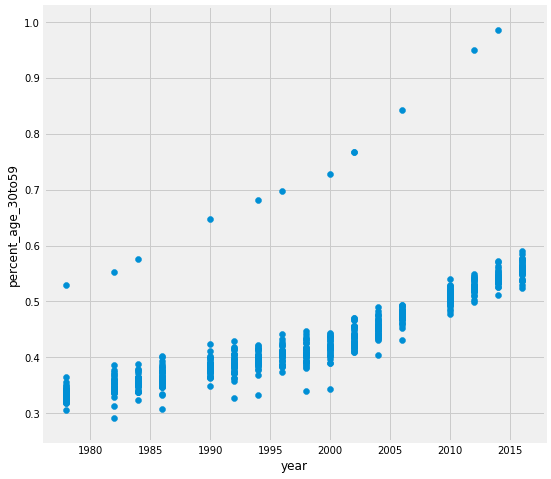

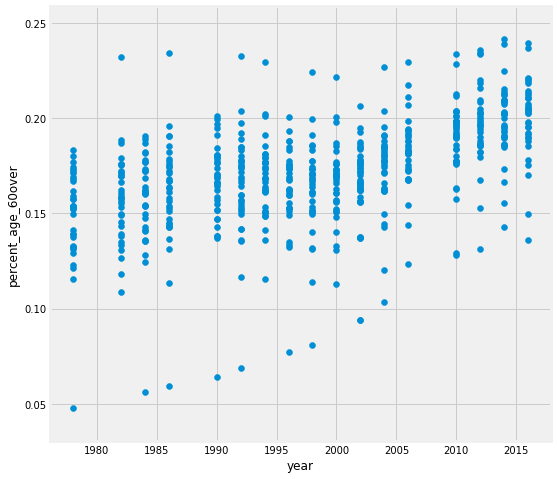

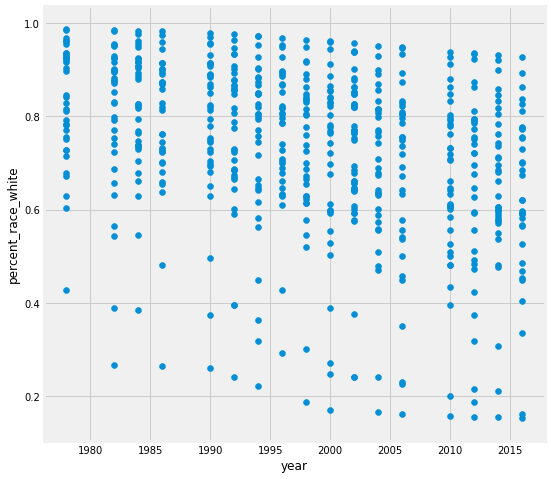

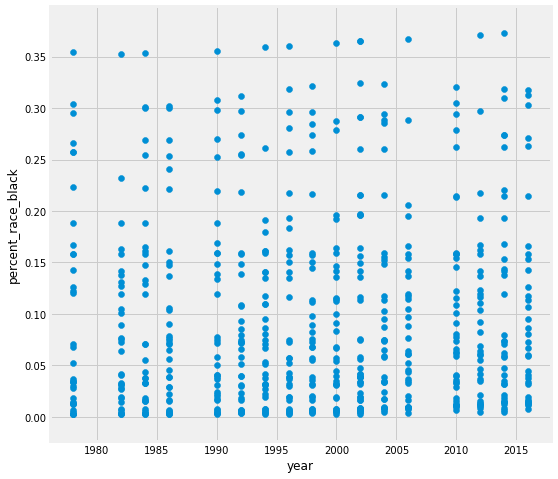

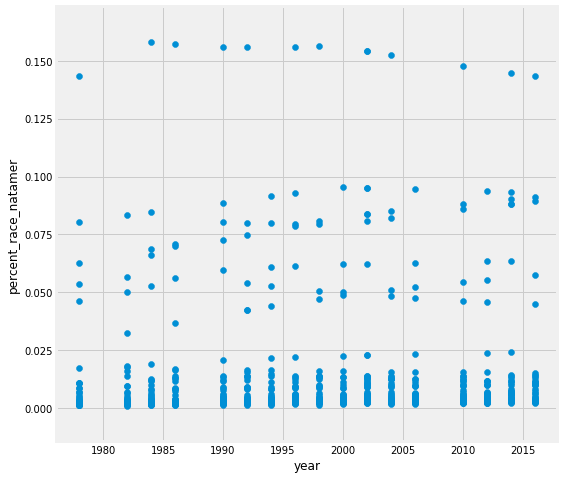

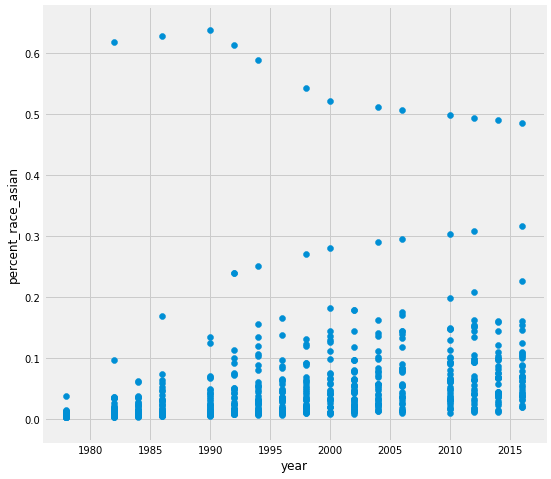

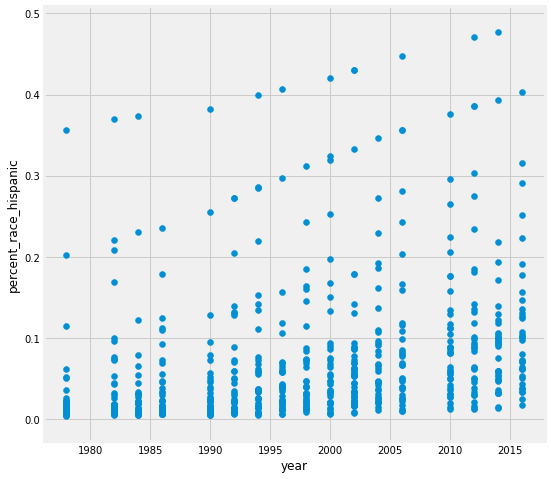

In [13]:
for col in list(sen_vals.columns):
    scatter_time(col, sen_vals)